## Subplots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from pathlib import Path
data_path = Path('../data')

%matplotlib inline

data = pd.read_csv(data_path/ 'house.csv')

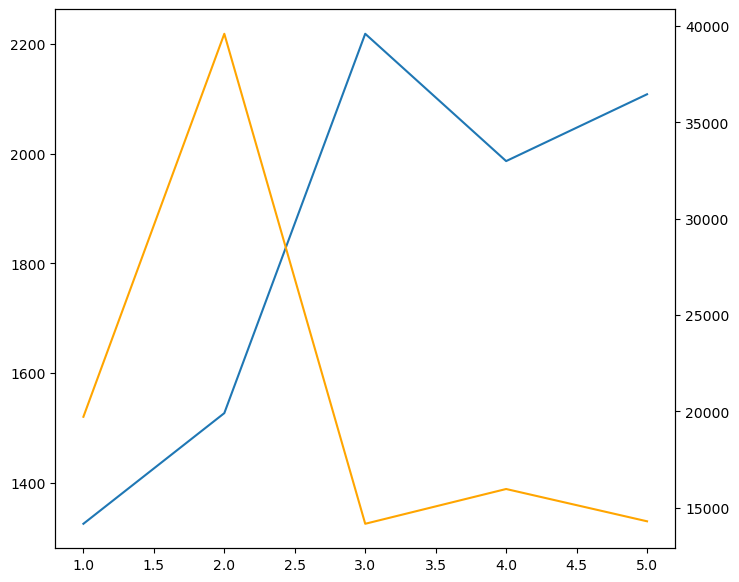

In [7]:
agrup = data.groupby('condition').agg({'sqft_living' : 'mean','sqft_lot' : 'mean'})
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label= 'sqft_living')

ax1= ax.twinx()

ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color='orange')

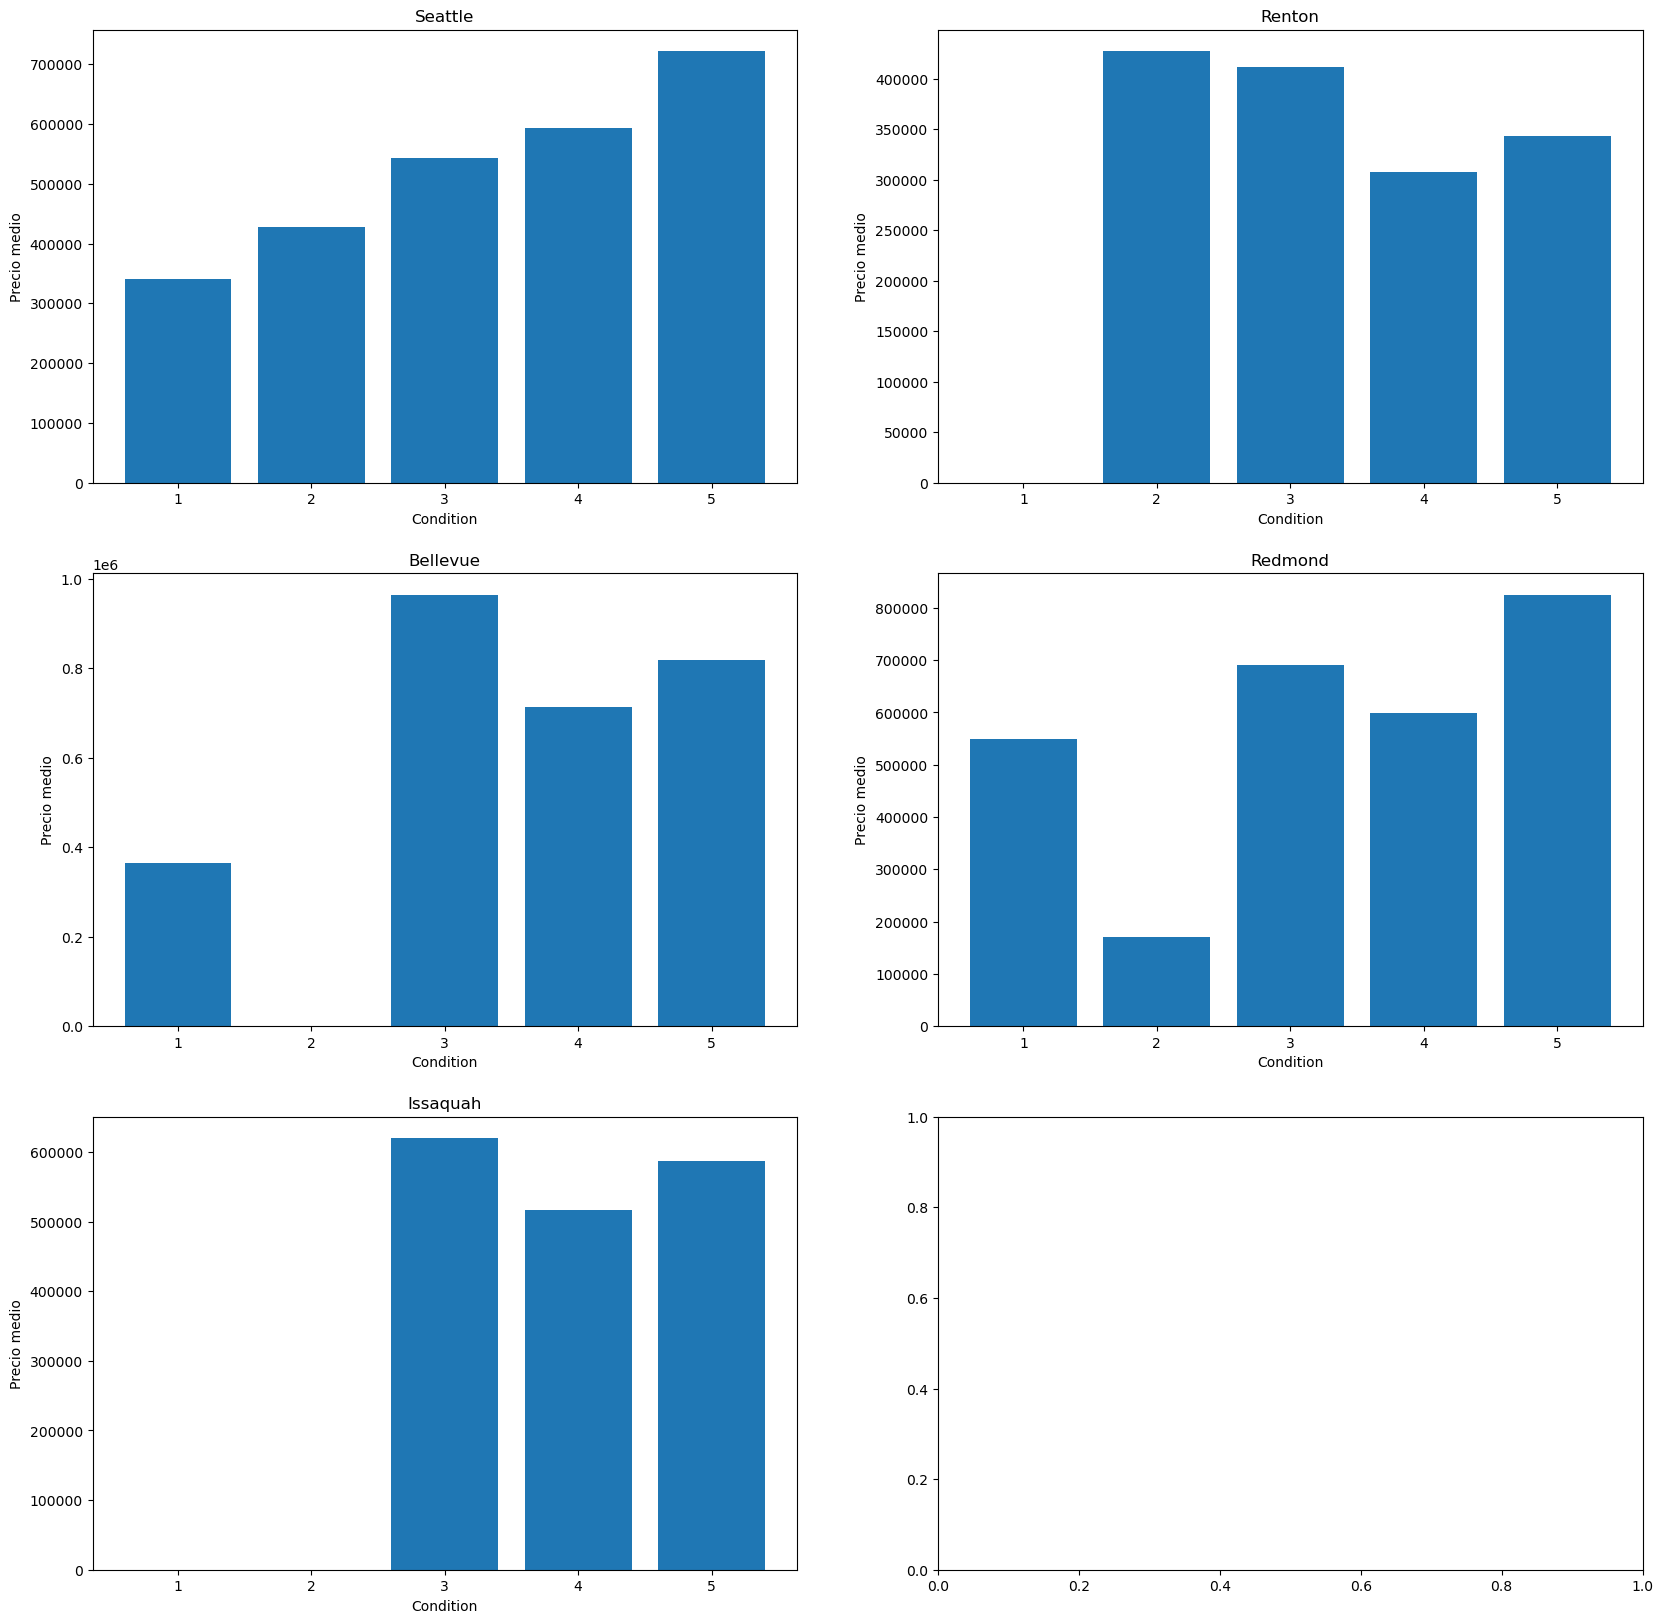

In [16]:
cities=data.query('city in ("Seattle","Renton","Bellevue","Redmond","Issaquah")')
agr = cities.groupby(['city', 'condition'])['price'].mean().unstack().T
agr.fillna(0, inplace=True)

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

cities = ["Seattle","Renton","Bellevue","Redmond","Issaquah"]

i,j=0,0;
for c in cities:
    ax[i,j].bar(x=agr.index,height=agr[c].values)
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('Condition')
    ax[i,j].set_ylabel('Precio medio')
    
    
    j+=1
    if j==2:
        j=0
        i+=1